In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('energy_consumption.csv.csv')

In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [ ]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(df, x='timeStamp', y='demand', title='Energy Consumption')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
el_df=df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f691fd2a7d0>,
      dtype=object)

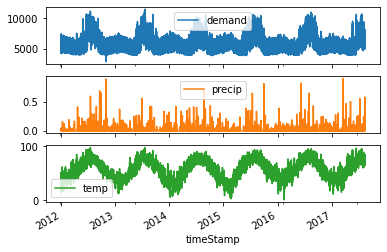

In [ ]:
el_df.plot(subplots=True)

In [ ]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   timeStamp    False
demand        True
precip        True
temp          True
dtype: bool


In [ ]:
df['demand']=df['demand'].fillna(method='ffill')

In [ ]:
df['temp']=df['temp'].fillna(method='ffill')

In [ ]:
df['precip']=df['precip'].fillna(method='ffill')

In [ ]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   timeStamp    False
demand       False
precip       False
temp         False
dtype: bool


In [ ]:
el_df.resample('M').mean()

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f691d728850>,
      dtype=object)

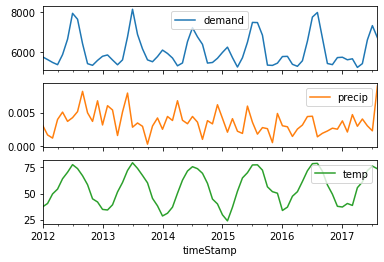

In [ ]:
el_df.resample('M').mean().plot(subplots=True)

In [ ]:
final_df=el_df.resample('M').mean()

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.4 MB/s 
     |████████████████████████████████| 9.8 MB 33.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pm

model = pm.auto_arima(final_df['demand'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.725, Time=0.77 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.422, Time=1.46 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.84 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1022.606, Time=3.52 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1008.009, Time=3.80 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=999.313, Time=1.33 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1041.793, Time=0.32 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AI

In [ ]:
final_df

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


In [ ]:
train=final_df[(final_df.index.get_level_values(0) >= '2012-01-31') & (final_df.index.get_level_values(0) <= '2017-04-30')]
test=final_df[(final_df.index.get_level_values(0) > '2017-04-30')]

In [ ]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002266,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [ ]:
model.fit(train['demand'])

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [ ]:
forecast

(array([5633.94133486, 6492.11453773, 7294.39789221, 7488.32067909]),
 array([[4922.94686356, 6344.93580616],
        [5708.92810865, 7275.3009668 ],
        [6498.44718246, 8090.34860197],
        [6690.00742397, 8286.6339342 ]]))

In [ ]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [ ]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5633.941335
2017-06-30,6492.114538
2017-07-31,7294.397892
2017-08-31,7488.320679


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

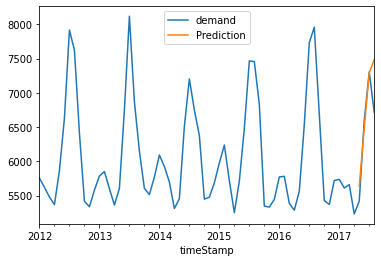

In [ ]:
pd.concat([final_df['demand'],forecast_df],axis=1).plot()

In [ ]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [ ]:
forecast_range=pd.date_range(start='2017-05-31', periods=8,freq='M')

In [ ]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

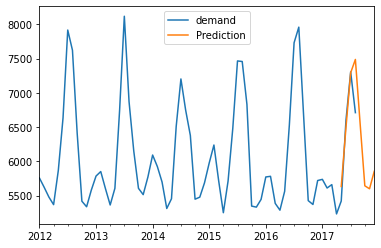

In [ ]:
pd.concat([final_df['demand'],forecast1_df],axis=1).plot()